In [38]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torchvision.transforms as T

In [39]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10
model = nn.Sequential(
    nn.Linear(input_size, hidden_sizes[0]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[0], hidden_sizes[1]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[1], output_size),
    nn.LogSoftmax(dim=1)
    )

model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [65]:
def predict_proba(image):
    # load image
    image = Image.fromarray((image[:, :, 0]).astype(np.uint8))
    image = image.resize((28, 28))
    
    # plt.imshow(image, cmap="gray")

    # convert to tensor
    transforms = T.ToTensor()
    tensor = transforms(image)

    # predict
    with torch.no_grad():
        output = model(tensor.view(1,-1))
        prob = torch.exp(output)
    return prob

In [66]:
image = ImageOps.grayscale(Image.open('input.png'))
prob = predict_proba(np.asarray(image).reshape((300,300,1)))
prob

tensor([[1.2678e-03, 5.4249e-01, 2.7087e-01, 1.1132e-02, 6.1076e-06, 1.0173e-03,
         7.4035e-02, 1.3481e-03, 9.7829e-02, 6.4960e-06]])

Text(0.5, 1.0, 'Predicted Probability')

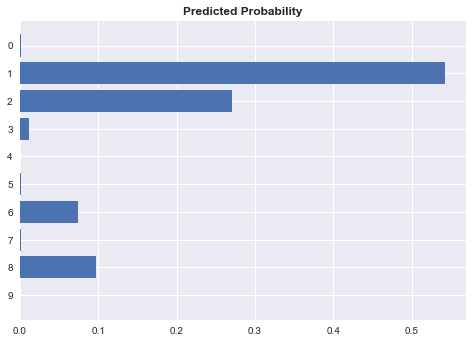

In [67]:
plt.style.use('seaborn')
plt.barh(range(0,10), prob.view(-1))
plt.gca().invert_yaxis()
plt.yticks(range(0,10))
plt.title("Predicted Probability", fontweight='bold')

In [79]:
black = Image.open('black.png')
x = np.asarray(black)
x.min()

0